# Project: Investigate a Dataset (Studying three factors for many countries across the last twenty years!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Study Objective**: In this study we will trying to find out the progress of the development of the countries across the last 20 years.

> We have selected three factors indecates the progress of the development of those countries.
  
1. First factor is for the health progress (child Mortality - dying kids/ 1000 kids in the age of five years or less).
  * it gives us the rate of the children dying in the age from 0 to 5 years old.
2. Second factor is for the economy (the total income per person).
  * it gives us the average of the total income per person. 
1. The last one is for the environment (the amount of CO2 per person)
  * it gives us the amount of CO2 per person.

__We will trying to understand the relationship between the reflection of gross in economy for the health and the environment !__

In [1]:
#---------------------------------------------------------------------------
# Importing liberary
#---------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#---------------------------------------------------------------------------
df_m = pd.read_csv(r'child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df_m.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,4.28,4.20,4.14,4.07,4.00,3.94,3.88,3.82,3.76,3.76
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30


<a id='wrangling'></a>
## Data Wrangling

> **Over view of the data**: For many years Gapminder gathering the data for many countries, and they have the prospective data as well for the upcoming 100 years.
So, we need to delete those data from the file, and we will ignore date from the 19th century because the culture of gathering data wasn't exist well.





### Data Cleaning (drop untrustworthy data !)

In [2]:
# ------------------------------------------------------------------------------------------
# drop untrustworthy data as there wasn't good inventory of this information in those years.
# ------------------------------------------------------------------------------------------
df_m.drop(df_m.columns[1:201], axis = 1, inplace = True)
df_m.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
2,Algeria,39.70,38.90,37.80,36.50,35.00,33.50,32.00,30.70,29.40,...,4.28,4.20,4.14,4.07,4.00,3.94,3.88,3.82,3.76,3.76
3,Andorra,6.41,6.16,5.93,5.71,5.49,5.27,5.05,4.84,4.62,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30


In [3]:
# -------------------------------------------------------------------------------------------------------
# drop the expected data from the website because it has built on the droped data from the previous cell.
# -------------------------------------------------------------------------------------------------------
df_m.drop(df_m.columns[22:102],axis = 1, inplace = True)
df_m.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,129.00,125.00,121.00,117.00,113.00,109.00,104.00,100.00,96.00,...,84.10,80.50,77.00,73.50,70.40,67.50,64.70,62.30,60.10,58.10
1,Albania,25.90,24.50,23.10,21.80,20.40,19.20,17.90,16.70,15.50,...,12.30,11.40,10.70,10.10,9.60,9.27,9.02,8.82,8.68,8.52
2,Algeria,39.70,38.90,37.80,36.50,35.00,33.50,32.00,30.70,29.40,...,26.70,26.10,25.70,25.30,24.90,24.50,24.00,23.50,22.80,22.20
3,Andorra,6.41,6.16,5.93,5.71,5.49,5.27,5.05,4.84,4.62,...,3.98,3.79,3.61,3.43,3.27,3.14,3.01,2.89,2.87,2.85
4,Angola,206.00,200.00,193.00,185.00,176.00,167.00,157.00,148.00,138.00,...,113.00,105.00,98.40,92.90,88.10,84.00,80.40,77.20,74.50,72.30


In [4]:
# -------------------------------------------------------------------------------------------------------
# To know how many columns left
# -------------------------------------------------------------------------------------------------------
df_m.shape

(195, 22)

In [5]:
# -------------------------------------------------------------------------------------------------------
# Get information about the data to see if there are uncomplete raws.
# -------------------------------------------------------------------------------------------------------
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
country    195 non-null object
2000       195 non-null float64
2001       195 non-null float64
2002       195 non-null float64
2003       195 non-null float64
2004       195 non-null float64
2005       195 non-null float64
2006       195 non-null float64
2007       195 non-null float64
2008       195 non-null float64
2009       195 non-null float64
2010       195 non-null float64
2011       195 non-null float64
2012       195 non-null float64
2013       195 non-null float64
2014       195 non-null float64
2015       195 non-null float64
2016       195 non-null float64
2017       195 non-null float64
2018       195 non-null float64
2019       195 non-null float64
2020       195 non-null float64
dtypes: float64(21), object(1)
memory usage: 33.6+ KB


<a id='eda'></a>
### likely we don't have missing data for the mortality factor.

In [6]:
# ---------------------------------------------------------------------------
# descrbing data to see if there are any deviation or unexpected data.
#----------------------------------------------------------------------------
df_m.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,56.339590,54.287692,52.147744,50.084872,48.180513,46.111436,44.212154,42.385026,40.737026,38.960821,...,35.829846,34.446974,33.177333,32.025692,30.947590,29.930308,28.944359,28.010923,27.201846,26.438821
std,56.840497,54.957400,52.892821,50.878232,48.828277,46.977535,45.079151,43.239413,41.537651,39.670042,...,36.381885,34.911238,33.590452,32.399137,31.269097,30.194907,29.227892,28.326894,27.558327,26.836237
min,3.860000,3.600000,3.380000,3.200000,3.060000,2.960000,2.890000,2.860000,2.830000,2.720000,...,2.520000,2.430000,2.340000,2.260000,2.180000,2.020000,1.850000,1.700000,1.630000,1.580000
25%,12.600000,12.050000,11.550000,11.100000,10.750000,10.450000,9.775000,9.370000,9.140000,8.875000,...,8.415000,8.265000,8.020000,7.955000,7.830000,7.580000,7.325000,7.060000,6.785000,6.570000
50%,30.800000,29.300000,28.400000,27.800000,26.600000,24.900000,23.400000,22.400000,21.800000,21.100000,...,19.200000,18.600000,18.300000,18.100000,17.800000,17.400000,17.000000,16.600000,15.900000,15.500000
75%,88.200000,86.500000,84.300000,80.250000,77.600000,73.750000,69.750000,67.100000,64.300000,60.500000,...,55.950000,53.600000,52.100000,50.350000,48.300000,46.300000,44.500000,42.750000,40.900000,39.400000
max,234.000000,229.000000,223.000000,217.000000,210.000000,204.000000,196.000000,189.000000,180.000000,172.000000,...,154.000000,147.000000,142.000000,138.000000,133.000000,129.000000,125.000000,122.000000,119.000000,117.000000


In [7]:
# -------------------------------------------------------------------------------------------------------
# Ressitting the data to be easy to merge with other data.
# -------------------------------------------------------------------------------------------------------
df_m = df_m.set_index('country').loc[:,'2000':].reset_index()
df_m = pd.melt(df_m, id_vars = ['country'], var_name = 'year', value_name = "mortality")
df_m.head()

,country,year,mortality
0,Afghanistan,2000,129.00
1,Albania,2000,25.90
2,Algeria,2000,39.70
3,Andorra,2000,6.41
4,Angola,2000,206.00


In [8]:
# -------------------------------------------------------------------------------------------------------
# Inserting the other value (income per person).
# -------------------------------------------------------------------------------------------------------
df_income = pd.read_csv(r'income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_income.drop(df_income.columns[1:201], axis = 1, inplace = True)
df_income.drop(df_income.columns[22:102],axis = 1, inplace = True)
df_income = pd.melt(df_income, id_vars = ['country'], var_name = 'year', value_name = 'income')
df_income.head()

,country,year,income
0,Afghanistan,2000,687
1,Albania,2000,5440
2,Algeria,2000,10300
3,Andorra,2000,31700
4,Angola,2000,3890


In [9]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 3 columns):
country    4053 non-null object
year       4053 non-null object
income     4053 non-null int64
dtypes: int64(1), object(2)
memory usage: 95.1+ KB


<a id='eda'></a>
### likely we don't have missing data for the income factor.

Text(0,0.5,'Income')

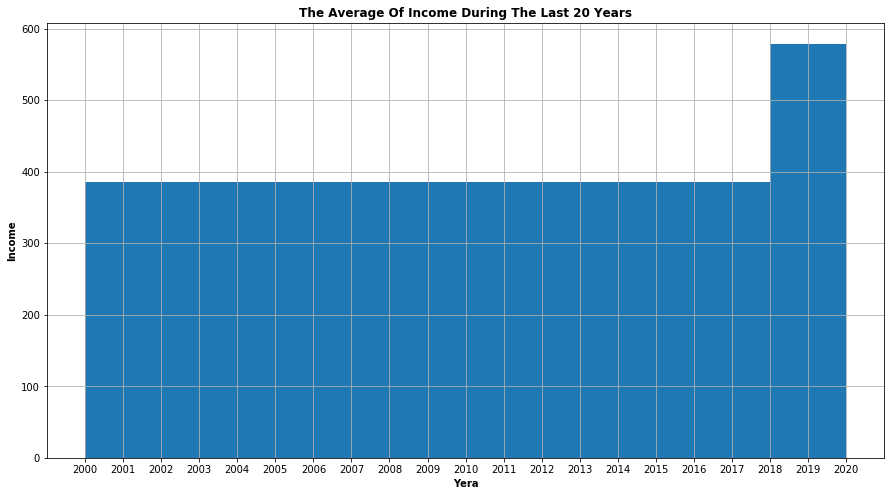

In [10]:
# -------------------------------------------------------------------------------------------------------
# graph the data to seeing it better.
# -------------------------------------------------------------------------------------------------------
df_income.year.hist(figsize = (15,8));
plt.title('The average of income during the last 20 years'.title(),fontsize=12, weight='bold')
plt.xlabel('yera'.title(),fontsize = 10, weight='bold')
plt.ylabel('income'.title(),fontsize = 10, weight='bold')

<a id='eda'></a>
### Notes that the income' average inflation.

In [11]:
# -------------------------------------------------------------------------------------------------------
# gathering the other value (co2 emission per person).
# -------------------------------------------------------------------------------------------------------
df_co2 = pd.read_csv(r'co2_emissions_tonnes_per_person.csv')
df_co2.drop(df_co2.columns[1:201], axis = 1, inplace = True)
df_co2.drop(df_co2.columns[24:102],axis = 1, inplace = True)
df_co2 = pd.melt(df_co2, id_vars = ['country'], var_name = 'year', value_name = "co2_emissions")
df_co2.head()

,country,year,co2_emissions
0,Afghanistan,2000,0.037
1,Albania,2000,0.966
2,Algeria,2000,2.820
3,Andorra,2000,8.020
4,Angola,2000,0.581


In [12]:
# -------------------------------------------------------------------------------------------------------
# ensuring that the value (co2 emission per person) has no missing data.
# -------------------------------------------------------------------------------------------------------
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 3 columns):
country          3648 non-null object
year             3648 non-null object
co2_emissions    3646 non-null float64
dtypes: float64(1), object(2)
memory usage: 85.6+ KB


<a id='eda'></a>
### we have missing data for the CO2 emissions factor.
### we have to fix this issue.

In [13]:
# -------------------------------------------------------------------------------------------------------
# Using the mean method to fill in the missing data.
# -------------------------------------------------------------------------------------------------------
mean = df_co2['co2_emissions'].mean()
df_co2['co2_emissions'].fillna(mean, inplace = True)

In [14]:
# -------------------------------------------------------------------------------------------------------
# testing the result.
# -------------------------------------------------------------------------------------------------------
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 3 columns):
country          3648 non-null object
year             3648 non-null object
co2_emissions    3648 non-null float64
dtypes: float64(1), object(2)
memory usage: 85.6+ KB


<a id='eda'></a>
### Now we don't have missing data for the CO2 emissions factor.

Text(0,0.5,'Co2')

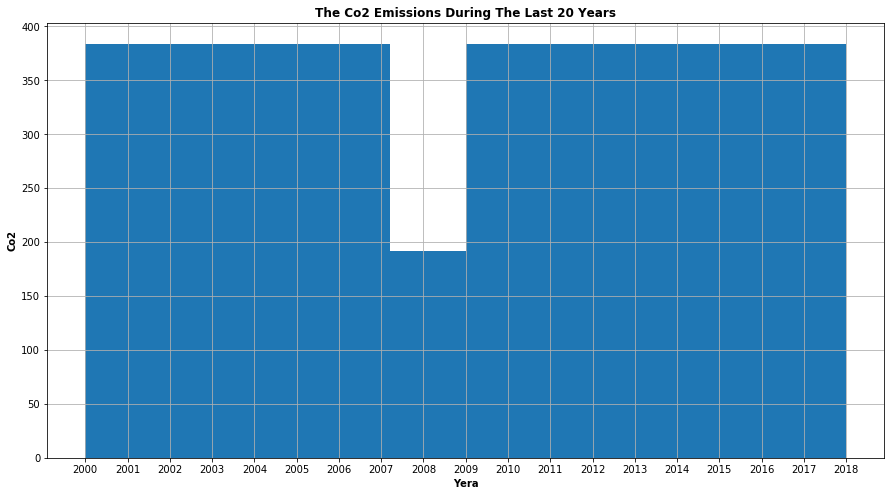

In [15]:
# -------------------------------------------------------------------------------------------------------
# graph the data to seeing it better.
# -------------------------------------------------------------------------------------------------------
df_co2.year.hist(figsize = (15,8));
plt.title('The co2 emissions during the last 20 years'.title(),fontsize=12, weight='bold')
plt.xlabel('yera'.title(),fontsize = 10, weight='bold')
plt.ylabel('CO2'.title(),fontsize = 10, weight='bold')

<a id='eda'></a>
### Notes the drop of the amount of carbon dioxid in the year of 2008.

In [16]:
# -----------------------------------------------------------------------------------------------
# merging the mortality data with the income data together.
# -----------------------------------------------------------------------------------------------
mid_df = pd.merge(df_m,df_income, on=['country','year'])
mid_df.head()

,country,year,mortality,income
0,Afghanistan,2000,129.00,687
1,Albania,2000,25.90,5440
2,Algeria,2000,39.70,10300
3,Andorra,2000,6.41,31700
4,Angola,2000,206.00,3890


In [17]:
# -----------------------------------------------------------------------------------------------
# merging all data together.
# -----------------------------------------------------------------------------------------------
final_df = pd.merge(mid_df,df_co2, on=['country','year'])
final_df.head()

,country,year,mortality,income,co2_emissions
0,Afghanistan,2000,129.00,687,0.037
1,Albania,2000,25.90,5440,0.966
2,Algeria,2000,39.70,10300,2.820
3,Andorra,2000,6.41,31700,8.020
4,Angola,2000,206.00,3890,0.581


<a id='eda'></a>
## Exploratory Data Analysis

By visualizing the data using Histograms and lines it gives us the progress for all the countries. So, we can ask two questions!

#### The first Question: What the relationship between the development of economic and the health and the environment?

#### The Second Question: Is the global economic crisis 2008 affect any of those factors ?

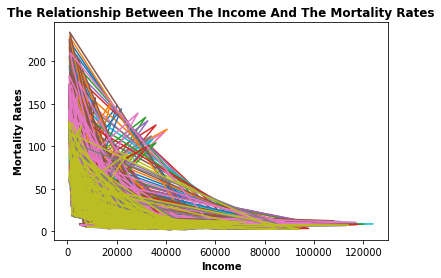

In [18]:
year_set = set(final_df['year'])
income_set = set(final_df['income'])
mortality_set = set(final_df['mortality'])
year_set = set(final_df['year'])
plt.figure()
for year in year_set:
     selected_data = final_df.loc[final_df['year'] == year]
     plt.plot(selected_data['income'], selected_data['mortality'], label='income')
plt.title('The relationship between the income and the mortality rates'.title(),fontsize=12, weight='bold')
plt.xlabel('income'.title(),fontsize = 10, weight='bold')
plt.ylabel('Mortality rates'.title(),fontsize = 10, weight='bold')
plt.show()

<a id='eda'></a>
#### There are a negative relationship between the income and the mortality

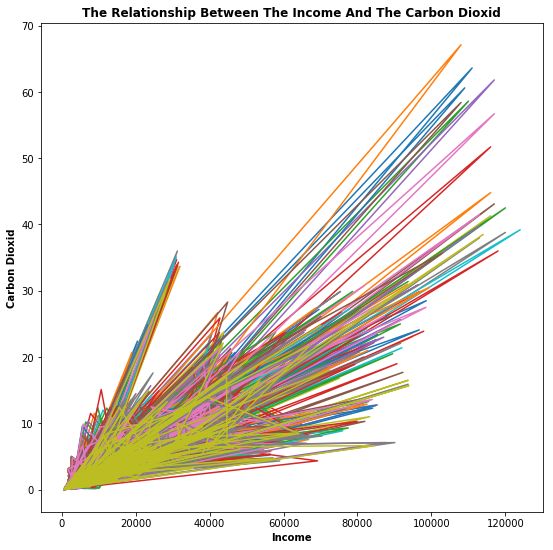

In [19]:
year_set = set(final_df['year'])
plt.figure(figsize = (9,9));
for year in year_set:
     selected_data = final_df.loc[final_df['year'] == year]
     plt.plot(selected_data['income'], selected_data['co2_emissions'], label='income')
plt.title('The relationship between the income and the carbon dioxid'.title(),fontsize=12, weight='bold')
plt.xlabel('income'.title(),fontsize = 10, weight='bold')
plt.ylabel('carbon dioxid'.title(),fontsize = 10, weight='bold')   
plt.show()

<a id='eda'></a>
#### There are a positive relationship between the income and the CO2 emissions.

In [20]:
# -----------------------------------------------------------------------------------------------
# Sorting data by the mean.
# -----------------------------------------------------------------------------------------------
final_df.groupby('country').mortality.mean().sort_values()

country
Iceland                       2.823684
Singapore                     2.964737
Finland                       3.118421
Sweden                        3.292105
Luxembourg                    3.304211
Japan                         3.391579
Norway                        3.510000
Slovenia                      3.551579
Czech Republic                3.878947
Cyprus                        4.063684
Spain                         4.112632
Italy                         4.125789
Germany                       4.377895
Austria                       4.447895
France                        4.458947
Andorra                       4.482632
Portugal                      4.506842
Denmark                       4.539474
Belgium                       4.603158
Greece                        4.618421
Switzerland                   4.762632
South Korea                   4.765789
Ireland                       4.768421
Netherlands                   4.810526
Australia                     4.933684
Israel           

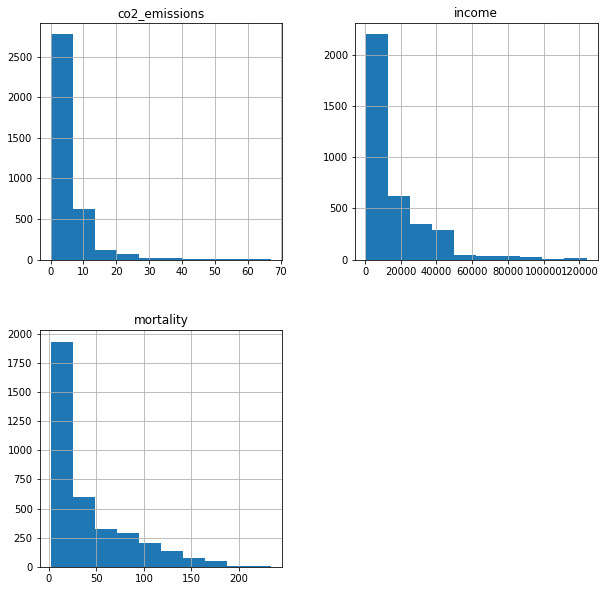

In [21]:
# --------------------------------------------------------------------------------------
# it seems deficult to be analysed so we need to see graphs showing the data better.
# --------------------------------------------------------------------------------------
final_df.hist(figsize = (10,10));

In [22]:
# -----------------------------------------------------------------------------------------------
# Sorting data by the mean.
# -----------------------------------------------------------------------------------------------
final_df.groupby('country').income.mean().sort_values()

country
Somalia                        615.894737
Congo, Dem. Rep.               669.631579
Burundi                        715.842105
Niger                          824.631579
Central African Republic       845.947368
Mozambique                     911.000000
Malawi                        1002.473684
Ethiopia                      1071.578947
Liberia                       1138.315789
Sierra Leone                  1221.736842
Togo                          1287.894737
Rwanda                        1352.473684
Afghanistan                   1389.105263
Madagascar                    1400.526316
Burkina Faso                  1402.631579
Guinea-Bissau                 1433.157895
Gambia                        1462.631579
Uganda                        1487.894737
Haiti                         1628.421053
Chad                          1679.052632
North Korea                   1717.894737
Guinea                        1746.842105
Mali                          1810.526316
Benin                     

In [23]:
# -----------------------------------------------------------------------------------------------
# Sorting data by the mean.
# -----------------------------------------------------------------------------------------------
final_df.groupby('country').co2_emissions.mean().sort_values()

country
Congo, Dem. Rep.             0.029389
Burundi                      0.034447
Somalia                      0.052016
Central African Republic     0.063121
Rwanda                       0.067568
Chad                         0.071432
Malawi                       0.073195
Niger                        0.074611
Ethiopia                     0.088068
Uganda                       0.099742
Sierra Leone                 0.112432
Madagascar                   0.114821
Mali                         0.122095
Burkina Faso                 0.129942
South Sudan                  0.133774
Mozambique                   0.148484
Guinea-Bissau                0.154737
Tanzania                     0.161058
Afghanistan                  0.177837
Nepal                        0.183837
Liberia                      0.208579
Eritrea                      0.210895
Guinea                       0.212789
Comoros                      0.214842
Zambia                       0.215368
Haiti                        0.227684
Gamb

Text(0,0.5,'Year')

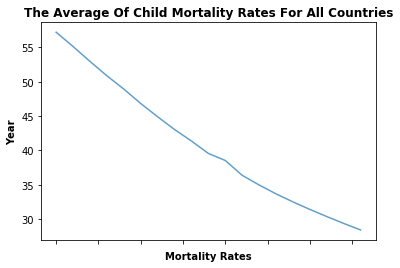

In [24]:
# -------------------------------------------------------------------------------------------------------
# line the data to seeing it better for the mortality.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('year').mortality.mean().plot(kind = 'line', title = 'final', alpha = 0.7);
plt.title('The average of child mortality rates for all countries'.title(),fontsize=12, weight='bold')
plt.xlabel('Mortality Rates'.title(),fontsize = 10, weight='bold')
plt.ylabel('Year'.title(),fontsize = 10, weight='bold')

<a id='eda'></a>
#### Clearly, the mortality rates decreasing by the time.

Text(0,0.5,'Country')

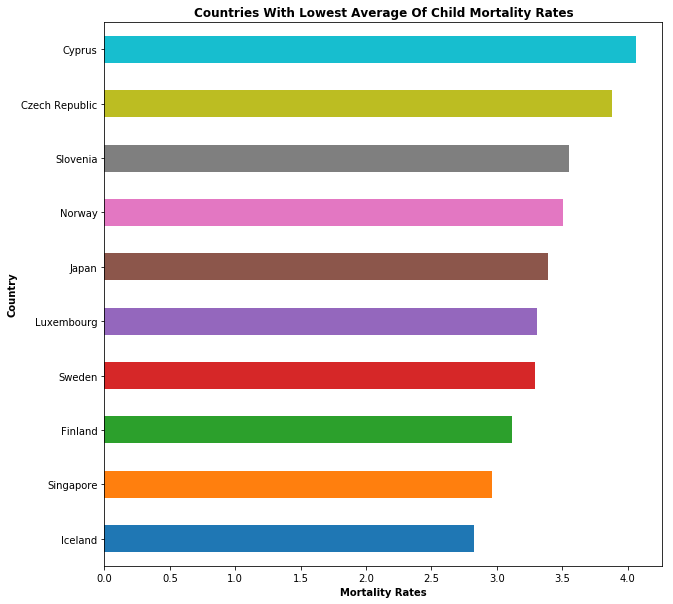

In [25]:
# -------------------------------------------------------------------------------------------------------
# plot the data to seeing it better for the lowest average of mortality.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('country').mortality.mean().sort_values()[:10].plot.barh(width = 0.5, figsize = (10,10));
plt.title('Countries with lowest average of child mortality rates'.title(),fontsize=12, weight='bold')
plt.xlabel('Mortality Rates'.title(),fontsize = 10, weight='bold')
plt.ylabel('Country'.title(),fontsize = 10, weight='bold')

Text(0,0.5,'Country')

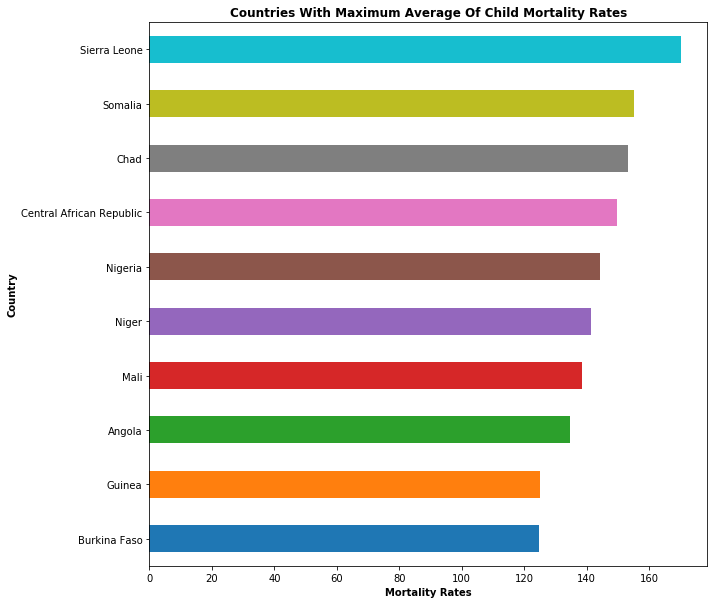

In [26]:
# -------------------------------------------------------------------------------------------------------
# Plot the data to seeing it better for the maximum average of mortality.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('country').mortality.mean().sort_values()[-10:].plot.barh(width = 0.5, figsize = (10,10));
plt.title('Countries with maximum average of child mortality rates'.title(),fontsize=12, weight='bold')
plt.xlabel('Mortality Rates'.title(),fontsize = 10, weight='bold')
plt.ylabel('Country'.title(),fontsize = 10, weight='bold')

<a id='eda'></a>
#### The countrie with high rates of mortality is very pooring countries and most of them are from the middle of Africa.

Text(0,0.5,'Year')

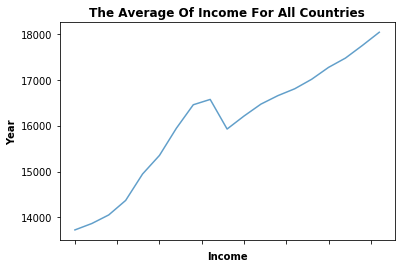

In [27]:
# -------------------------------------------------------------------------------------------------------
# line the data to seeing it better for the income.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('year').income.mean().plot(kind = 'line', title = 'final', alpha = 0.7);
plt.title('The average of income for all countries'.title(),fontsize=12, weight='bold')
plt.xlabel('Income'.title(),fontsize = 10, weight='bold')
plt.ylabel('Year'.title(),fontsize = 10, weight='bold')

<a id='eda'></a>
####  The average of income is increasing by the time.

Text(0,0.5,'Country')

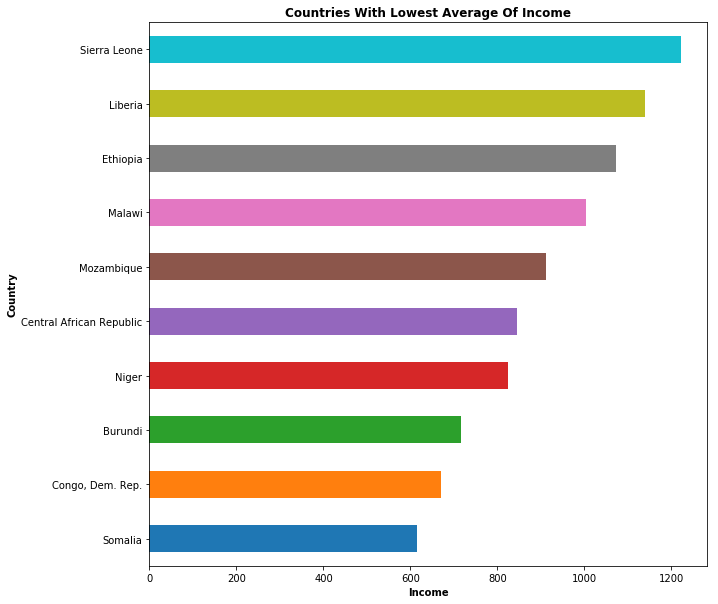

In [28]:
# -------------------------------------------------------------------------------------------------------
# plot the data to seeing it better for the lowest average of income.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('country').income.mean().sort_values()[:10].plot.barh(width = 0.5, figsize = (10,10));
plt.title('Countries with lowest average of income'.title(),fontsize=12, weight='bold')
plt.xlabel('income'.title(),fontsize = 10, weight='bold')
plt.ylabel('Country'.title(),fontsize = 10, weight='bold')

Text(0,0.5,'Country')

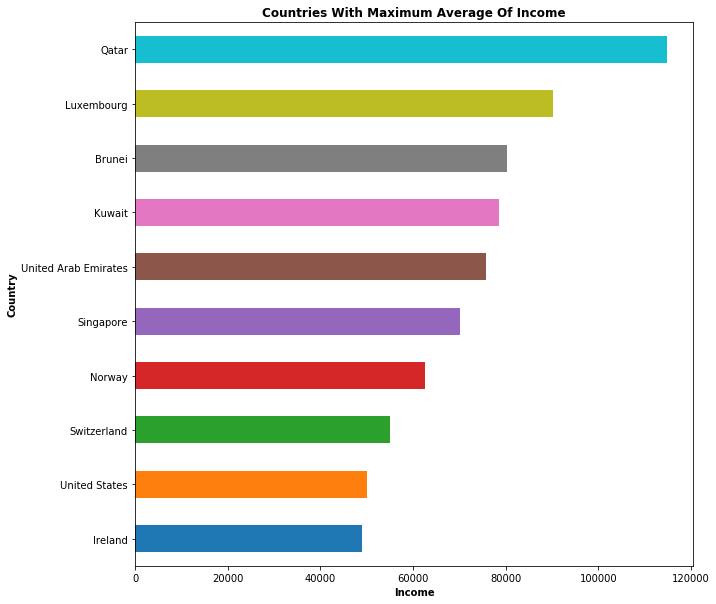

In [29]:
# -------------------------------------------------------------------------------------------------------
# plot the data to seeing it better for the maximum average of income.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('country').income.mean().sort_values()[-10:].plot.barh(width = 0.5, figsize = (10,10));
plt.title('Countries with maximum average of income'.title(),fontsize=12, weight='bold')
plt.xlabel('Income'.title(),fontsize = 10, weight='bold')
plt.ylabel('Country'.title(),fontsize = 10, weight='bold')

Text(0,0.5,'Year')

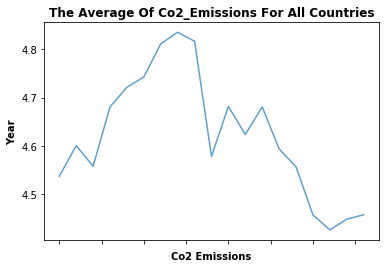

In [30]:
# -------------------------------------------------------------------------------------------------------
# line the data to seeing it better for the total average of co2 emissions.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('year').co2_emissions.mean().plot(kind = 'line', title = 'final', alpha = 0.7);
plt.title('The average of co2_emissions for all countries'.title(),fontsize=12, weight='bold')
plt.xlabel('CO2 Emissions'.title(),fontsize = 10, weight='bold')
plt.ylabel('Year'.title(),fontsize = 10, weight='bold')

<a id='eda'></a>
#### There are no releationship between the co2 emission and the time.

Text(0,0.5,'Country')

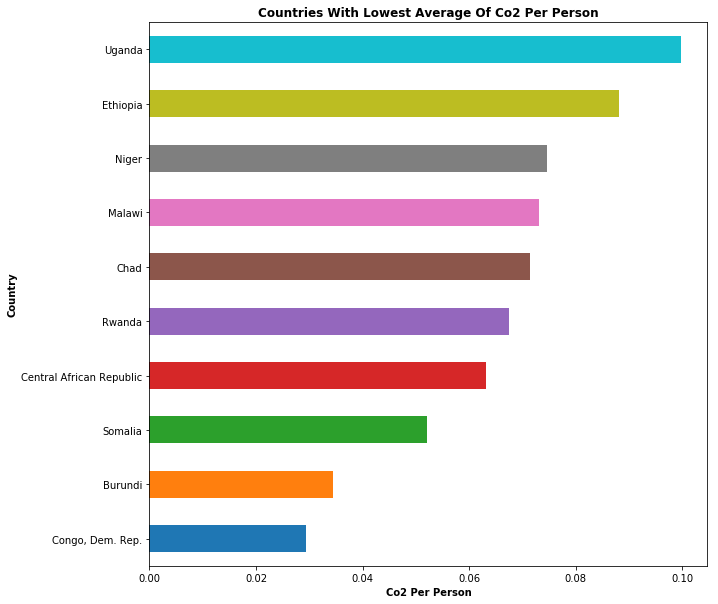

In [31]:
# -------------------------------------------------------------------------------------------------------
# plot the data to seeing it better for the minimum average of co2 emission per person.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('country').co2_emissions.mean().sort_values()[:10].plot.barh(width = 0.5, figsize = (10,10));
plt.title('Countries with lowest average of CO2 per person'.title(),fontsize=12, weight='bold')
plt.xlabel('CO2 per person'.title(),fontsize = 10, weight='bold')
plt.ylabel('Country'.title(),fontsize = 10, weight='bold')

Text(0,0.5,'Country')

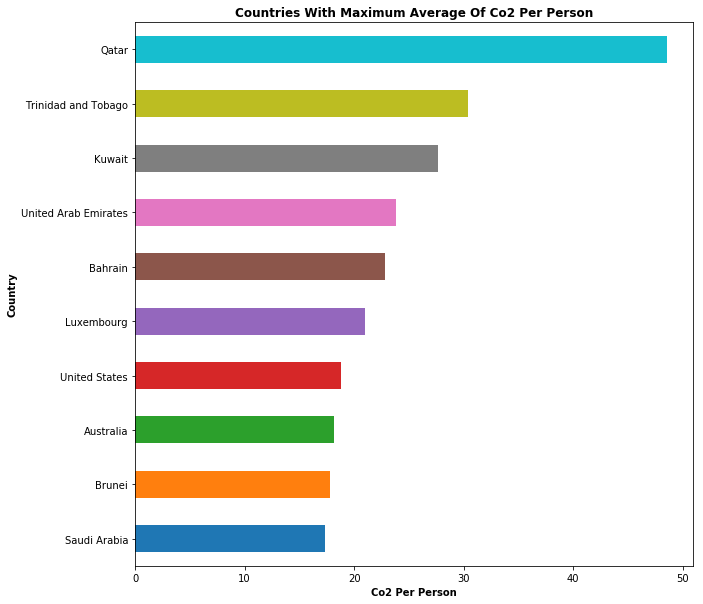

In [32]:
# -------------------------------------------------------------------------------------------------------
# plot the data to seeing it better for the maximum average of co2 emission per person.
# -------------------------------------------------------------------------------------------------------
final_df.groupby('country').co2_emissions.mean().sort_values()[-10:].plot.barh(width = 0.5, figsize = (10,10));
plt.title('Countries with maximum average of CO2 per person'.title(),fontsize=12, weight='bold')
plt.xlabel('CO2 per person'.title(),fontsize = 10, weight='bold')
plt.ylabel('Country'.title(),fontsize = 10, weight='bold')

<a id='eda'></a>
#### It looks like the country with high average of income the same with high amount of Carbon dioxid.

<a id='conclusions'></a>
## Conclusions

### Result: our data recommend that:

#### For the first question: 

 1- For Health:
   * We can say that the increasing of income affect the health care in in a good way !

 2- For Environment:
   * We can say that the increasing of income affect the environment badly in the same country! !


#### For the second Question: 
 1- Studying those three factors across the past twenty years in all the countries in the world 🌍  we can see that this crisis affect the total income per person around the world as we see the drop of the data between the year of 2008 and 2011 (Economic inflation).

### Limitations:

#### 1- There are unexpected result for some countries that the mortality rates increased by the time (For example: Canda) 
    so It needs more investigation.
    
#### 2- There are unexpected result for some countries that the income average decreased by the time. 
    so It needs more investigation.
